In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r'C:\Users\mailg\Documents\GitHub\Dataday-Grind-III\Dataset\air_quality_index.csv')

In [18]:
df.head(10)

,DATE,COUNTRY,CITY,VALUE
0,2019-01-01,US,San Antonio,42.0
1,2019-01-01,US,Saint Paul,21.0
2,2019-01-01,US,Denver,42.0
3,2019-01-01,US,San Francisco,13.0
4,2019-01-01,US,Madison,14.0
5,2019-01-01,US,Salem,77.0
6,2019-01-01,US,Philadelphia,35.0
7,2019-01-01,US,San Diego,55.0
8,2019-01-01,US,Columbus,22.0
9,2019-01-01,IN,New Delhi,314.0


In [19]:
Cities_IN = df.loc[df['COUNTRY']=='IN']

In [20]:
Cities_IN.head(10) # Restricting Dataset to Indian Cities. APAC ++

,DATE,COUNTRY,CITY,VALUE
9,2019-01-01,IN,New Delhi,314.0
10,2019-01-01,IN,Chennai,135.0
13,2019-01-01,IN,Nashik,160.0
19,2019-01-01,IN,Chandigarh,163.0
21,2019-01-01,IN,Bhopal,175.0
26,2019-01-01,IN,Hyderabad,161.0
42,2019-01-01,IN,Delhi,341.0
52,2019-01-01,IN,Hāpur,347.0
54,2019-01-01,IN,Patna,388.0
55,2019-01-01,IN,Visakhapatnam,172.0


In [21]:
df.isnull().sum() # NULL Value Check

DATE       0
COUNTRY    0
CITY       0
VALUE      0
dtype: int64

In [28]:
df.columns

Index(['DATE', 'COUNTRY', 'CITY', 'VALUE'], dtype='object')

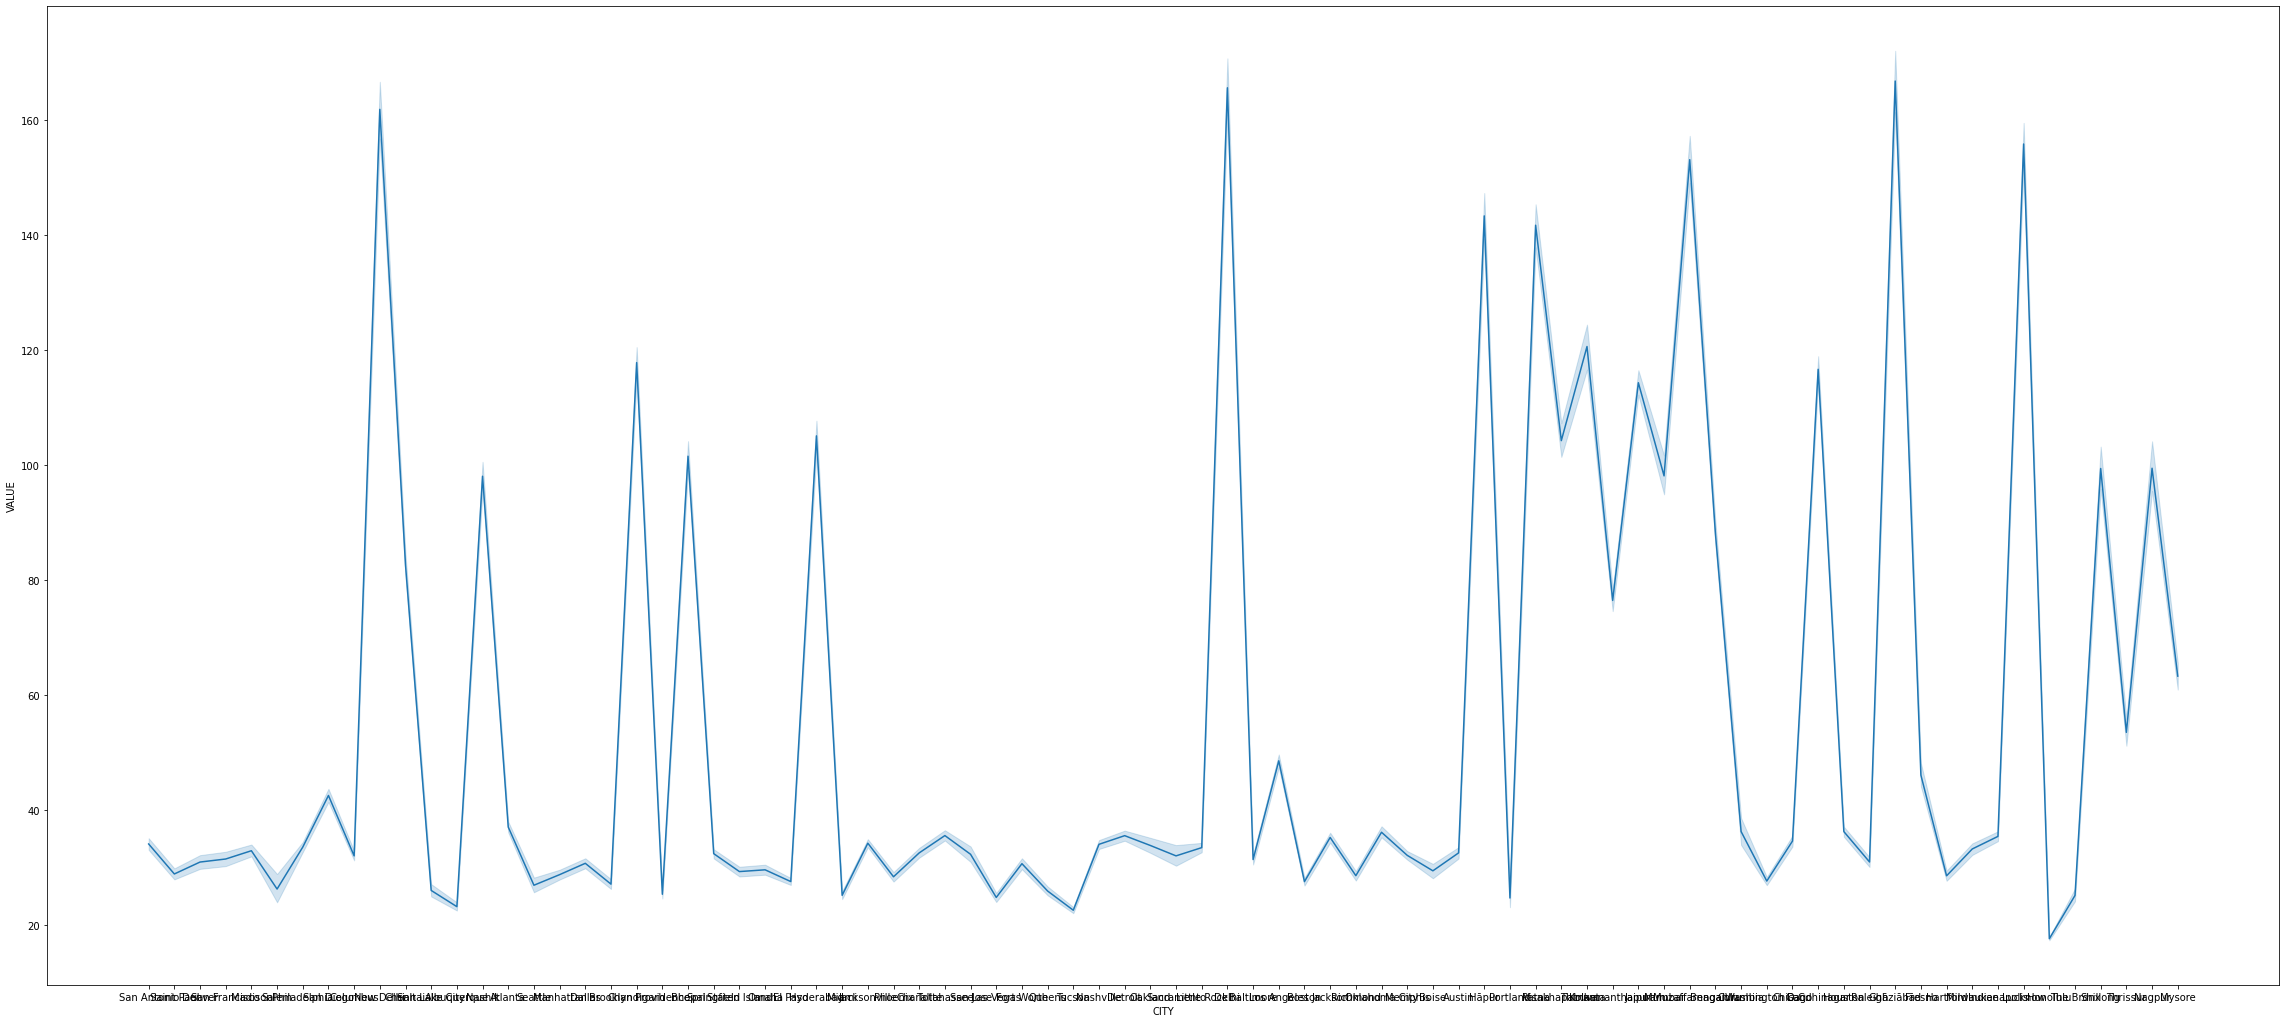

In [92]:
plt.figure(figsize=(40,18))
sns.lineplot(x = df["CITY"], y = df["VALUE"])
plt.show()   

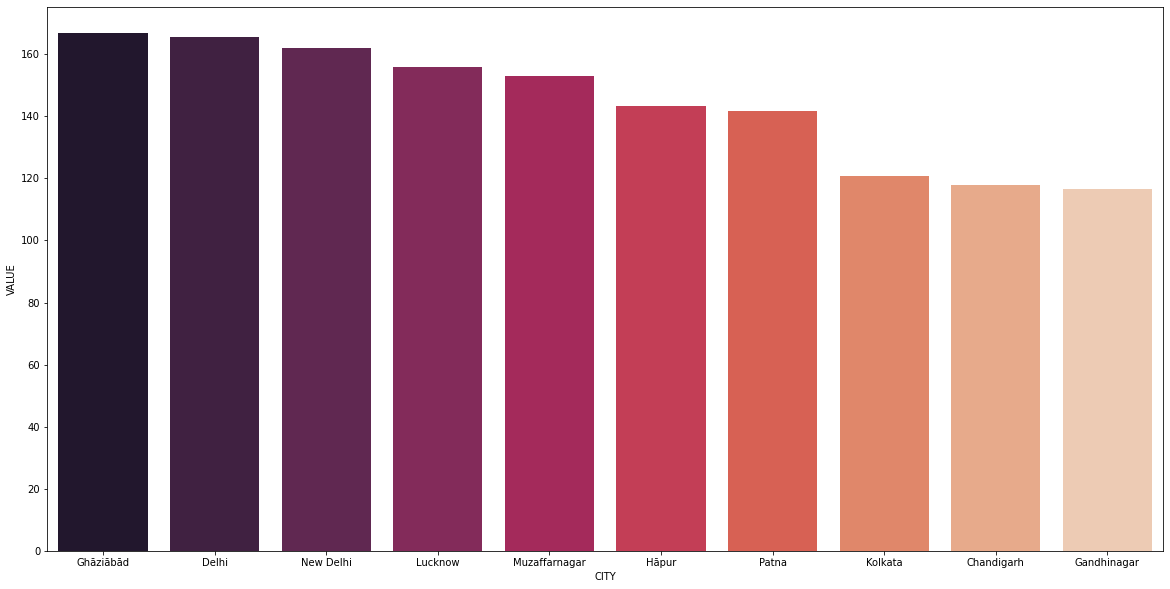

In [93]:
def topPollutedCities(pollutant):
    polu = Cities_IN[[pollutant,"CITY"]].groupby(["CITY"]).mean().sort_values(by = pollutant,ascending = False).reset_index()
    polu[pollutant] = round(polu[pollutant],2)  
    return polu[:10]

top10 = topPollutedCities("VALUE")      

## plotting bar plot for max polluted cities
plt.figure(figsize = (20,10))
sns.barplot(x = top10["CITY"], y= top10["VALUE"], data = top10, palette="rocket") 
plt.show()        

In [94]:
df["date"] = pd.to_datetime(df["DATE"],dayfirst=True)


In [95]:
df.head()

,DATE,COUNTRY,CITY,VALUE,date
0,2019-01-01,US,San Antonio,42.0,2019-01-01
1,2019-01-01,US,Saint Paul,21.0,2019-01-01
2,2019-01-01,US,Denver,42.0,2019-01-01
3,2019-01-01,US,San Francisco,13.0,2019-01-01
4,2019-01-01,US,Madison,14.0,2019-01-01


<Figure size 1152x1296 with 0 Axes>

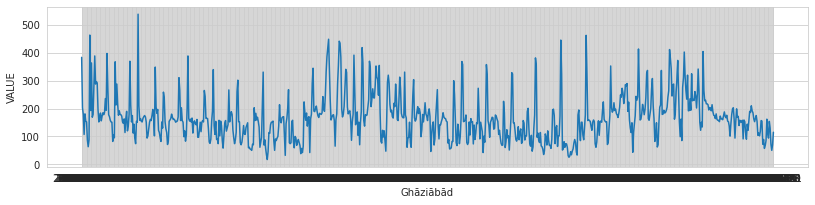

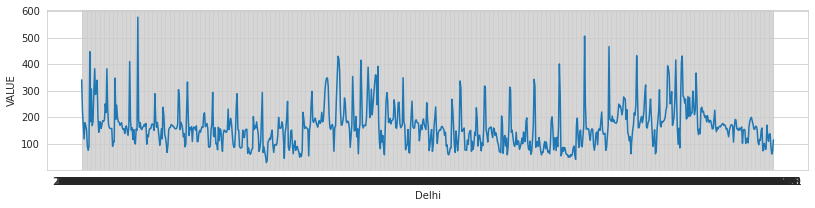

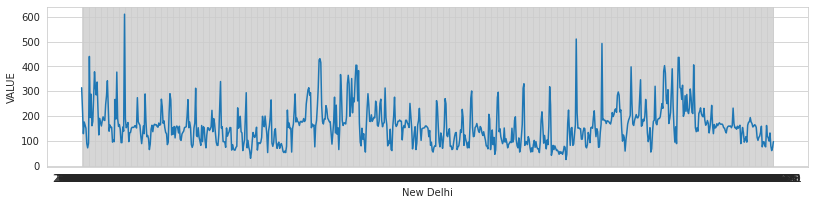

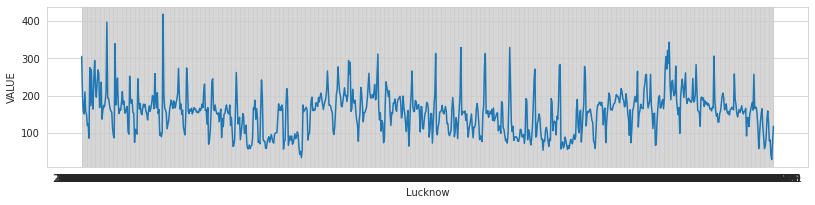

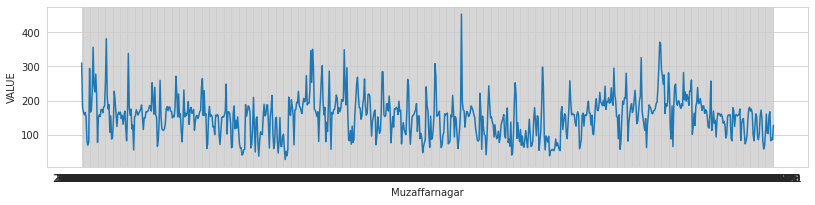

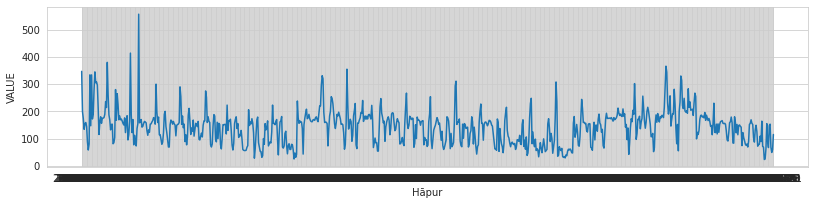

ValueError: num must be 1 <= num <= 6, not 7

<Figure size 2160x720 with 0 Axes>

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,18))
i=0
for city in cities:
    p = Cities_IN[Cities_IN["CITY"]==city]
    i +=1
    plt.figure(figsize=(30,10))
    plt.subplot(3,2,i)
    sns.lineplot(x = p["DATE"], y = p["VALUE"], data = p)
    plt.xlabel(city)
    plt.show()

plt.show()